# Database Info

The following example demonstrates how to extract information from the datasets `*_Info.md`, and summarize information from several datsets in the database.

We utilize `pandas` for representation of data tables and `matplotlib` for visualization of data.

In [1]:
import os, glob, pandas, matplotlib, numpy
import matplotlib.pyplot as plt

First, we download some example data from the `lapdMouse` data archive using the `lapdMouseUtils` module which is part of the [lapdMousePythonExamples](https://github.com/lapdMouse/lapdMousePythonExamples).

In [2]:
from lapdMouseUtils import DBUtil
db=DBUtil()
for i in range(1,11):
  db.downloadFile('m%02d/m%02d_Info.md'%(i,i))

## Parsing data from Info.md
General information about the dataset, including mouse physiological parameters, aerosol dosing, notes about data acquisition and processing, and other findings are stored in Markdown files following a specific template that allows parsing for specific entries. We define a function `getInfo` that parses such an `*_Info.md` files and returns it as a dictionary.

In [3]:
def getInfo(infoFilename):
  info = {}
  StringValues = ['Sex', 'Strain', 'Vendor']#, 'Physical abnormalities']
  FloatValues = ['Particle size', 'Exposure time', 'Relative exposure estimate',\
    'Total centerline length', 'Number of branches' ' Number of terminal branches',\
    'Maximum generation number', 'Number of outlet areas', 'Weight (g)', 'Lung volume']
  keys = StringValues
  keys.extend(FloatValues)
  for line in open(infoFilename,'r').read().split('\n'):
    for key in keys:
      if line.find(key+': ')!=-1:
        data = line[line.find(key+': ')+len(key)+2:]
        if key in FloatValues:
          try:
            data = float(data.split(' ')[0])
          except ValueError:
            data = float('nan')
        info[key] = data
  return info

This allows parsing an `Info.md` files, and return a set general information of as a python dictionary:

In [4]:
info = getInfo('./m01/m01_Info.md')
for key, value in info.items():
  print(key+': '+str(value))

Sex: Male
Strain: B6C3F1
Weight (g): nan
Vendor: Charles Rivers
Particle size: 1.0
Exposure time: 10.0
Total centerline length: 658.742
Maximum generation number: 25.0
Number of outlet areas: 2004.0
Lung volume: 1154.35


## Summarizing all Info.md files from database
below we first search for all `*_Info.md` files in the database, parse them using `getInfo` defined above, and summarize results in a table (pandas dataframe).

In [5]:
infoFiles = glob.glob(os.path.join('.','*/*_Info.md'))
databaseInfo = {os.path.basename(i)[:3]: getInfo(i) for i in infoFiles}
df = pandas.DataFrame.from_dict(databaseInfo, orient='index')
df.head(10)

,Sex,Strain,Weight (g),Vendor,Particle size,Exposure time,Total centerline length,Maximum generation number,Number of outlet areas,Lung volume
m07,Male,C57BL/6,24.1,Jackson Labs,1.0,10.0,571.870,27.0,1680.0,1116.76
m09,Female,BALB/c,23.7,Jackson Labs,1.0,10.0,529.485,26.0,1810.0,1128.40
m08,Female,C57BL/6,23.0,Jackson Labs,1.0,10.0,597.903,25.0,1995.0,1055.43
m06,Female,B6C3F1,21.0,Charles Rivers,1.0,10.0,605.276,25.0,1912.0,1103.35
m01,Male,B6C3F1,NaN,Charles Rivers,1.0,10.0,658.742,25.0,2004.0,1154.35
m04,Male,CD-1,24.4,Charles Rivers,1.0,10.0,453.592,24.0,1167.0,1224.19
m03,Male,BALB/c,23.8,Jackson Labs,1.0,10.0,556.905,25.0,1725.0,1142.07
m02,Female,B6C3F1,19.5,Charles Rivers,1.0,10.0,586.798,24.0,1817.0,1067.14
m05,Male,CD-1,NaN,Charles Rivers,1.0,10.0,569.515,23.0,1709.0,1211.21
m10,Female,BALB/c,NaN,Jackson Labs,1.0,10.0,524.425,25.0,1797.0,1144.66


This allow us now to search for datasets with specific characteristics or idenfity patterns.

The example below plots the mice's weight vs. lung volume color coded by mouse strains.

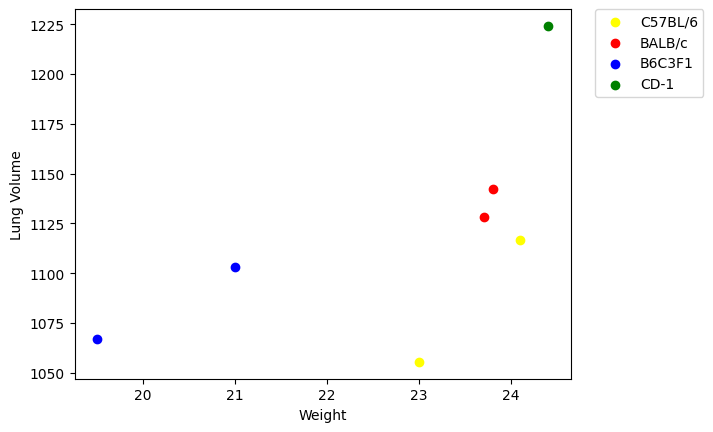

In [6]:
strains = df['Strain'].unique()
fig, ax = plt.subplots()
colors = {'B6C3F1': 'blue', 'BALB/c':'red', 'CD-1':'green', 'C57BL/6':'yellow'}
for i in strains:
  plt.scatter(\
    df.loc[df['Strain']==i,'Weight (g)'].values,\
    df.loc[df['Strain']==i,'Lung volume'].values,\
    c=colors[i], label=i)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
plt.xlabel('Weight')
plt.ylabel('Lung Volume');

The example below shows boxplots of the the mice's weight grouped by gender.

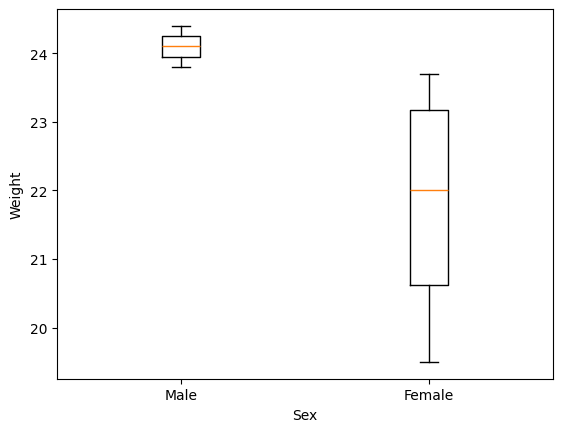

In [7]:
genders = df['Sex'].unique()
plt.figure()
data = [df.loc[df['Sex']==i,'Weight (g)'].dropna().values for i in genders]
plt.boxplot(data, labels=genders)
plt.xlabel('Sex')
plt.ylabel('Weight');